### **OpenAI SDK for Python Samples**

In [1]:
! pip install openai -U

In [2]:
from openai import AzureOpenAI

In [3]:
client = AzureOpenAI(
  azure_endpoint = 'Your Azure OpenAI Service Endpoint', 
  api_key='Your Azure OpenAI Service Key',  
  api_version="2023-05-15"
)

In [4]:
response = client.chat.completions.create(
    model="Your Azure OpenAI Service gpt-3.5-turbo-16k model Deployment Name", 
    messages=[
        {"role": "system", "content": "You are a AI teacher."},
        {"role": "user", "content": "Can you explain what is Machine Learning?"}
    ]
)

In [5]:
response.choices[0].message.content

'Machine Learning is a subset of Artificial Intelligence (AI) that involves developing algorithms and models that enable computers to learn from data without being explicitly programmed. In other words, instead of being explicitly programmed to perform specific tasks, machines are trained on large sets of data to automatically identify patterns, make decisions, and perform tasks.\n\nThe process of machine learning typically involves the following steps:\n\n1. Data collection: A large amount of relevant and representative data is collected to train the machine learning models.\n\n2. Data preprocessing: The collected data is cleaned, transformed, and normalized to ensure its quality and make it suitable for training the models.\n\n3. Feature extraction: Relevant features are selected from the data to help the machine learning algorithms understand and learn from it.\n\n4. Model selection: The appropriate machine learning algorithm or model is chosen based on the problem to be solved, dat

In [6]:
dalle_client = AzureOpenAI(
  azure_endpoint = 'Your Azure OpenAI Service Endpoint', 
  api_key='Your Azure OpenAI Service Key',   
  api_version="2023-12-01-preview"
)

In [8]:
result = dalle_client.images.generate(
    model="Your Azure OpenAI Service Dall-E 3 model Deployment Name", # the name of your DALL-E 3 deployment
    prompt="Chinese New Year picture for the Year of the Dragon",
    n=1
)

In [9]:
import os
import requests
from PIL import Image
import json

In [10]:
json_response = json.loads(result.model_dump_json())

In [11]:
image_dir = os.path.join(os.curdir, 'images')

In [12]:
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [13]:
image_path = os.path.join(image_dir, 'generated_image.png')

In [14]:
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [15]:
image = Image.open(image_path)

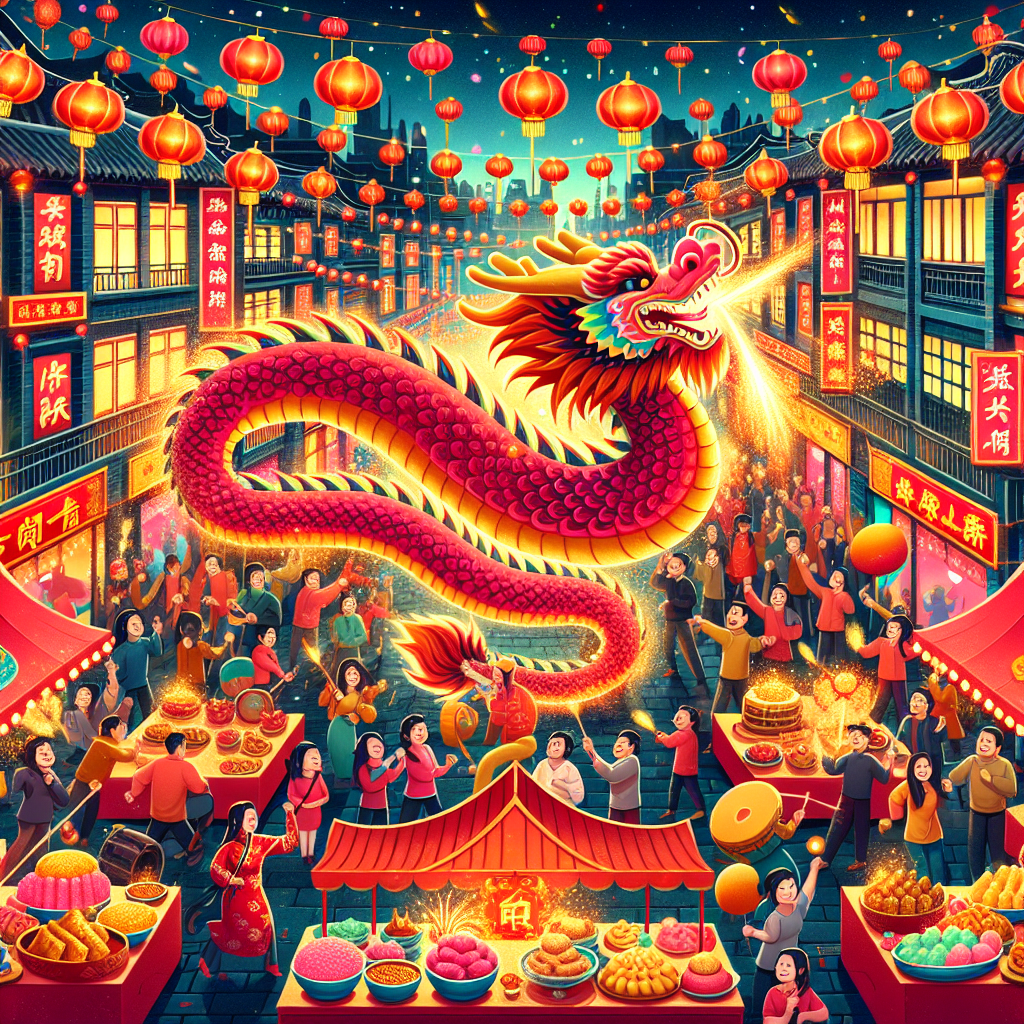

In [16]:

image